# 🧠 Deep Learning Practical Assignment (Adult Income Dataset)

## 📌 Dataset
We will use the **Adult Income dataset** (also known as the Census Income dataset).  
The task is to predict whether a person earns **more than $50K/year** based on demographic and employment attributes.

---


## Part 0: Data Preparation
1. Load the dataset into a DataFrame.
2. Split the data into **training, validation, and test sets**.  
   - Suggested: 70% training, 15% validation, 15% test.
3. Apply any necessary preprocessing:
   - Handle categorical features (encoding).
   - Scale numerical features if needed.
4. After training your models, always report results on:
   - **Training accuracy**
   - **Validation accuracy**
   - **Test accuracy**
5. At the end of the assignment, **compare all methods** across train, validation, and test sets.


1) Loading Data

In [129]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Load dataset from OpenML
adult = fetch_openml(name="adult", version=2, as_frame=True)
df = adult.frame
print(df.shape) 
df.head()

(48842, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [130]:
# dropping unneccessary/redundant features
df.drop(columns=['fnlwgt', 'education'], inplace=True)

In [131]:
# Dropping Duplicated Entries
df.drop_duplicates(inplace=True)
print(df.shape)

# Dropping Nulls
df.dropna(inplace=True)
print(df.shape)

(42468, 13)
(39240, 13)


2. Splitting

In [132]:
from sklearn.model_selection import train_test_split

# Binary encoding Target before splitting
df['class'] = (df['class'] == '>50K').astype(int)

# Separate features and target
X = df.drop(columns="class")
y = df["class"]

# Train - Validation - Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.15, random_state=42)

3. Neccessary Pre-Processing

In [133]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer

to_one_hot = X.select_dtypes(['category']).columns
to_scale = X.select_dtypes(['int64']).columns

Preprocessor = ColumnTransformer([
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'), to_one_hot),
    ('scaler', RobustScaler(), to_scale)
])

X_train_prep = Preprocessor.fit_transform(X_train)
X_val_prep = Preprocessor.transform(X_val)
X_test_prep = Preprocessor.transform(X_test)


## Part 1: Optimizers
1. Train the same neural network using:
   - Stochastic Gradient Descent (SGD)
   - SGD with Momentum
   - Adam
2. Compare the training and validation accuracy for each optimizer.
3. Which optimizer converges the fastest? Which gives the best generalization?
4. Explain *why* Adam often performs better than plain SGD.

---


In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD, Adam

def buildModel(input_dim):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

input_dim = X_train_prep.shape[1]

# 1) SGD Model
print('Training SGD Model:')
modelsgd = buildModel(input_dim)
modelsgd.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
history_sgd = modelsgd.fit(X_train_prep, y_train, validation_data=(X_val_prep, y_val), epochs=20, batch_size=32)
print()

# 2) SGD + Momentum
print('Training SGD + Momentum Model:')
model_mom = buildModel(input_dim)
model_mom.compile(optimizer=SGD(learning_rate=0.0005, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])
history_mom = model_mom.fit(X_train_prep, y_train, validation_data=(X_val_prep, y_val), epochs=20, batch_size=32)
print()

# 3) Adam
print('Training Adam Model:')
model_adm = buildModel(input_dim) 
model_adm.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
history_adm = model_adm.fit(X_train_prep, y_train, validation_data=(X_val_prep, y_val), epochs=20, batch_size=32)
print()

Training SGD Model:
Epoch 1/20
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7750 - loss: 7.4765 - val_accuracy: 0.7932 - val_loss: 0.3956
Epoch 2/20
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7998 - loss: 0.3850 - val_accuracy: 0.7966 - val_loss: 0.3909
Epoch 3/20
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8020 - loss: 0.3799 - val_accuracy: 0.8050 - val_loss: 0.3851
Epoch 4/20
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8035 - loss: 0.3771 - val_accuracy: 0.8045 - val_loss: 0.3856
Epoch 5/20
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8040 - loss: 0.3755 - val_accuracy: 0.8027 - val_loss: 0.3839
Epoch 6/20
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8050 - loss: 0.3741 - val_accuracy: 0.8061 - val_loss: 0.3799
Epoch 7/20
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8054 - loss: 0.3732 - val_accuracy: 0.8038 - val_loss: 0.3817
Epoch 8/20
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8067 - loss: 0.372

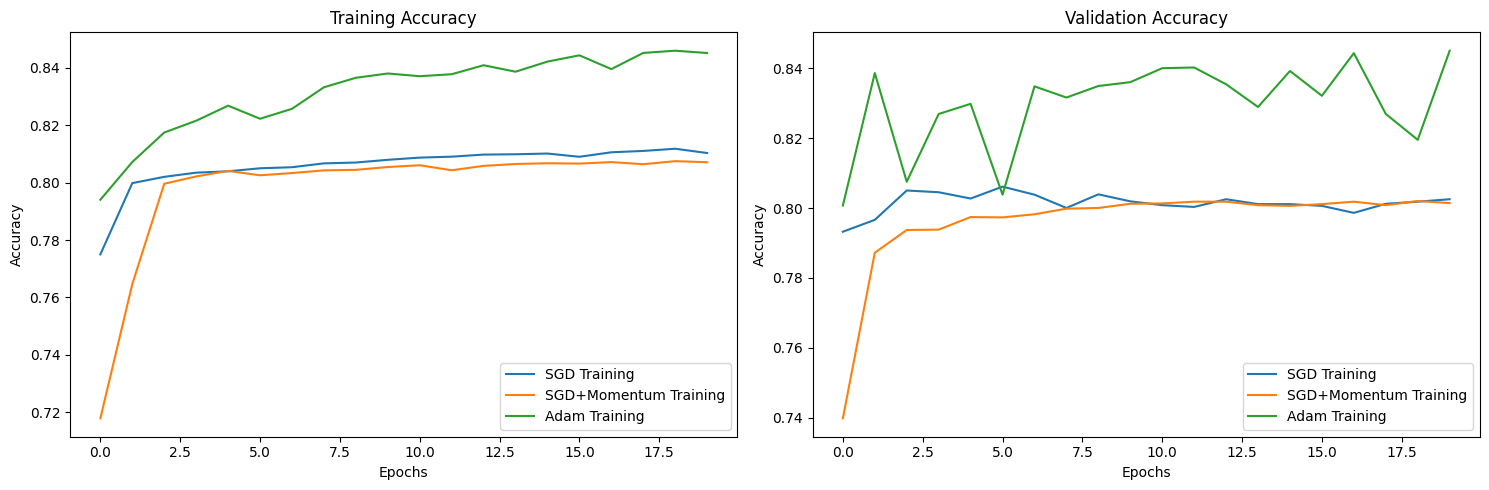

Final Validation Accuracies:
SGD: 0.8025
SGD + Momentum: 0.8014
Adam: 0.8450


In [137]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(history_sgd.history['accuracy'], label='SGD Training')
plt.plot(history_mom.history['accuracy'], label='SGD+Momentum Training')
plt.plot(history_adm.history['accuracy'], label='Adam Training')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history_sgd.history['val_accuracy'], label='SGD Training')
plt.plot(history_mom.history['val_accuracy'], label='SGD+Momentum Training')
plt.plot(history_adm.history['val_accuracy'], label='Adam Training')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Final Metrics
print("Final Validation Accuracies:")
print(f"SGD: {history_sgd.history['val_accuracy'][-1]:.4f}") # last recorded validation accuracy
print(f"SGD + Momentum: {history_mom.history['val_accuracy'][-1]:.4f}")
print(f"Adam: {history_adm.history['val_accuracy'][-1]:.4f}")

**Key Observations:**

- Adam achieved significantly higher validation accuracy (84.50% vs ~80.2%), and showed much higher training accuracy (84.52%) indicating better learning capacity

- SGD and SGD + Momentum performed very similarly across validation and training (~80.2%)


**Fastest Converge:**

- Adam - Reached ~83% validation accuracy by epoch 2

- SGD - Plateaued around 80% after just 3-4 epochs

- SGD + Momentum - Similar plateau to SGD but with more instability

**Best Generalization:**

- Adam gave the best absolute performance (84.50% validation)

- SGD showed the most stable and consistent learning curve

- SGD+Momentum was a bit less stable than plain SGD and didn't provide clear advantages

**Why Adam Performed Better:**

- Fast convergence: Jumped to 83.86% validation accuracy by epoch 2

- Higher final performance: 84.50% vs 80.25% for SGD

- Escapes local minima: Continued improving while SGD plateaued early, thanks to the fact it uses an adaptive learning rate and maintains parameter learning rates based on past gradients.

## Part 2: Batch Size
1. Train the same model with different batch sizes (e.g., 1, 32, 128, 1024).
2. Compare:
   - Training speed
   - Validation accuracy
   - Test accuracy
   - Generalization ability
3. Which batch size leads to the **noisiest gradient updates**?
4. Which batch size generalizes better and why?


## Part 3: Overfitting and Regularization
1. Train a large neural network (many parameters) on the dataset.
2. Observe training vs. validation accuracy.  
   - Do you see signs of overfitting?
3. Apply regularization techniques:
   - **L2 regularization**
   - **Dropout**
4. Compare the validation results before and after regularization.
5. Which regularization method was more effective in reducing overfitting? Why?

---


## Part 4: Early Stopping
1. Train the model for many epochs without early stopping.  
   - Plot training, validation, and test curves.
2. Train again with **early stopping** (monitor validation loss).
3. Compare the number of epochs trained and the final validation/test accuracy.
4. Explain how early stopping helps prevent overfitting.

---

## Part 5: Reflection
1. Summarize what you learned about:
   - The role of optimizers
   - The effect of batch size
   - Regularization methods
   - Early stopping
   - Train/validation/test splits
2. If you had to train a deep learning model on a new tabular dataset, what choices would you make for:
   - Optimizer
   - Batch size
   - Regularization
   - Early stopping
   - Data splitting strategy  
   and why?